CHAPTER 06 비지도 학습  
06-3 주성분 분석

차원(dimension)  
: 데이터가 가진 속성  
: 10,000개의 픽셀 = 10,000개의 특성 = 10,000개의 차원   
> 차원을 줄일 수 있다면 저장 공간을 절약할 수 있음

[주성분 분석(PCA)]  
: 대표적인 차원축소 알고리즘, 데이터의 차원을 줄이면서 중요한 정보(분산이 큰 방향)를 최대한 보존하는 방법  
: 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어듦

In [1]:
# 과일 사진 데이터 다운로드 후 넘파이 배열로 적재
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-11-08 16:32:19--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-08 16:32:19--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-08 16:32:20--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
# PCA 클래스 사용
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # n_components 매개변수에 주성분의 개수 지정해야 함
pca.fit(fruits_2d) # 비지도 학습이기에 타깃값 제공하지 않음

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
print(pca.components_.shape) # PCA 클래스가 찾은 주성분의 배열 크기 확인

(50, 10000)


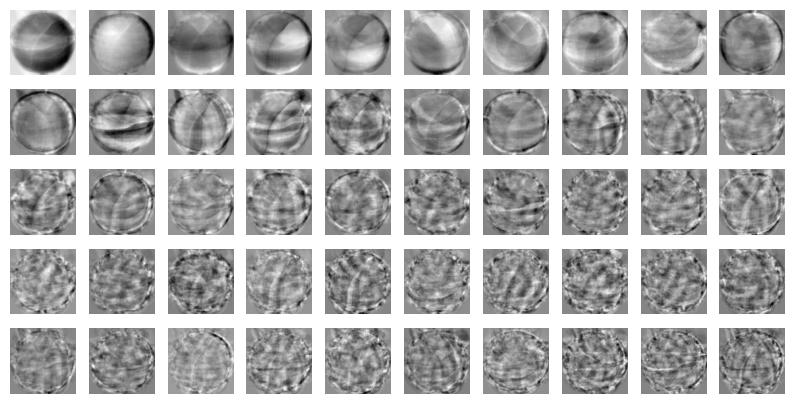

In [15]:
# 주성분 그림으로 나타내기
import matplotlib.pyplot as plt
def draw_fruits(pca, ratio=1):
    n = len(pca) # n은 샘플 개수
    rows = int(np.ceil(n/10)) # 샘플 개수를 10으로 나누어 전체 행 개수 계산
    cols = n if rows < 2 else 10 # 행이 1개이면 열의 개수는 샘플 개수, 아니면 10개
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False) # ratio 기본값은 1
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(pca[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d) # transform() 메서드 사용해 원본 데이터의 차원을 50으로 줄임
print(fruits_pca.shape)

(300, 10000)
(300, 50)


주성분 분석은 데이터 변환이 목적이므로 predict() 메서드를 제공하지 않음

In [14]:
# inverse_transform() 메서드 이용한 원본 데이터 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


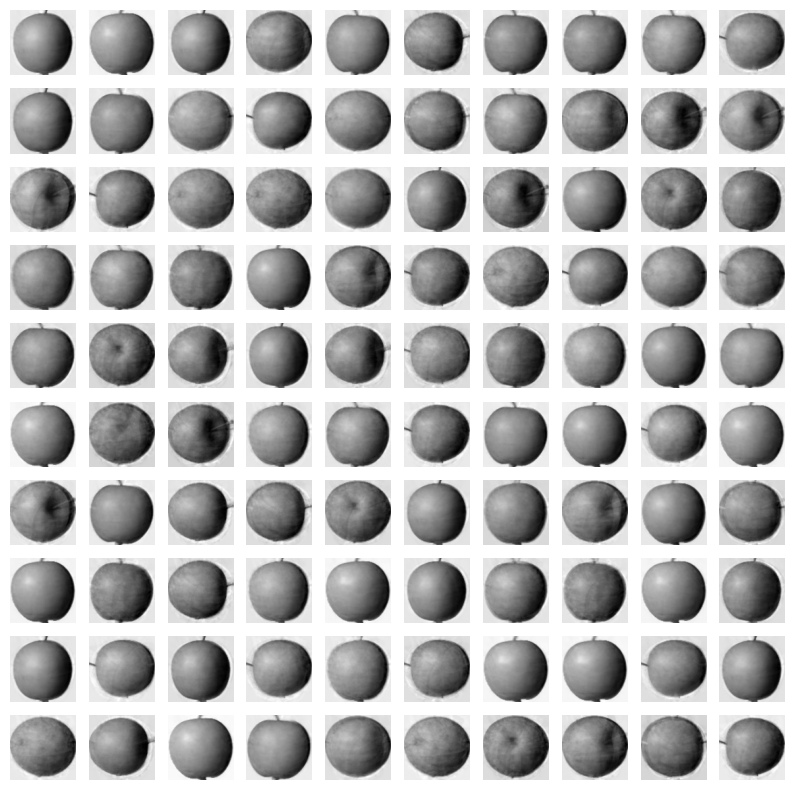

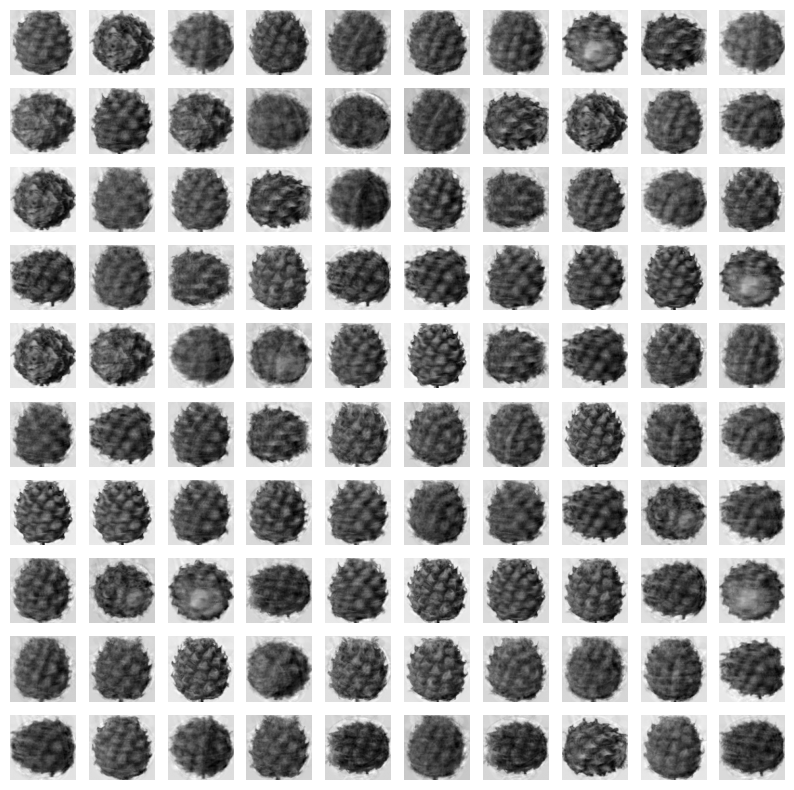

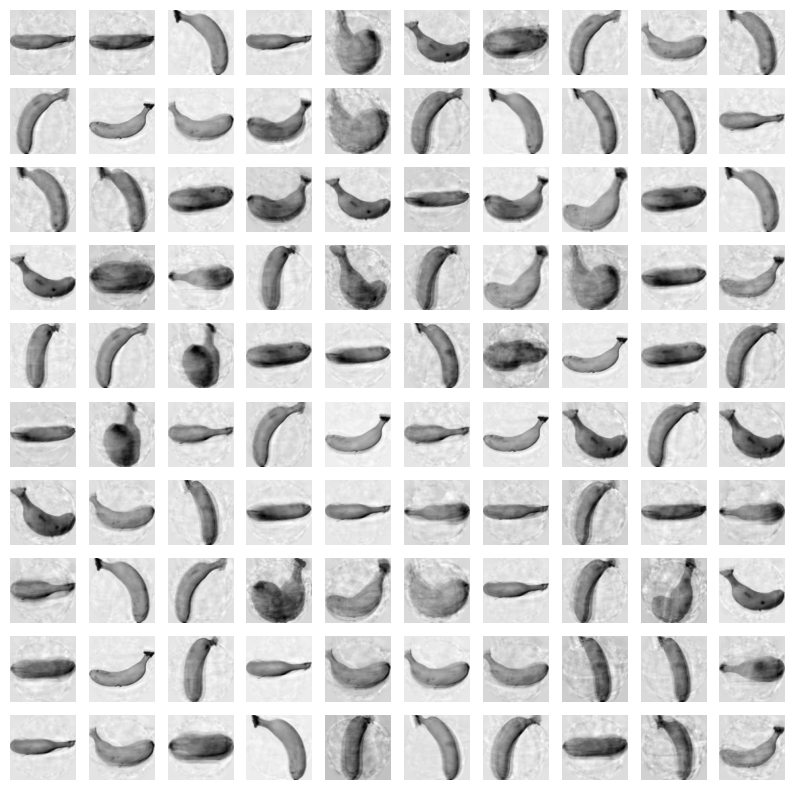

In [16]:
# 데이터를 100*100 크기로 바꾸어 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

설명된 분산  
: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값  

In [ ]:
print(np.sum(pca.explained_variance_ratio_)) # 총 분산 비율(각 주성분의 설명된 분산 비율의 합)

0.9215083330595826


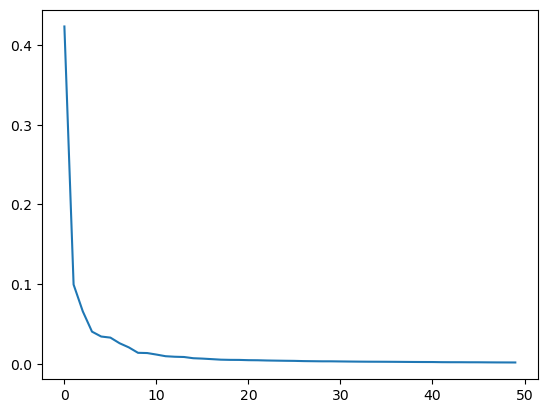

In [18]:
# 설명된 분산의 비율을 그래프로 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
# 로지스틱 회귀 모델 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
target = np.array([0]*100 + [1]*100 + [2]*100) # 지도 학습 위해 타깃값 지정

파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복함

In [23]:
# 원본 데이터 fruits_2d 사용
from sklearn.model_selection import cross_validate  # 교차 검증 수행
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.11833033561706544


In [24]:
# PCA로 축소한 fruits_pca 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.01859707832336426


정확도 동일, 훈련 시간 감소한 것 확인  
> PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음  

In [ ]:
# 설명된 분산의 50%에 달하는 주성분 찾도록 PCA 모델 만듦
pca = PCA(n_components=0.5)  # n_components 매개변수에 주성분의 개수 대신 0~1 사이의 비율을 입력할 수 있음
pca.fit(fruits_2d)

,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
print(pca.n_components_) # 주성분 갯수 확인

2


> 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음  

In [ ]:
# 앞의 모델로 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 변환된 데이터 크기 확인(주성분이 2)

(300, 2)


In [ ]:
# 2개 특성 이용한 교차 검증 결과 확인 
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.025344085693359376


/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/st

In [30]:
# 차원 축소된 데이터 이용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


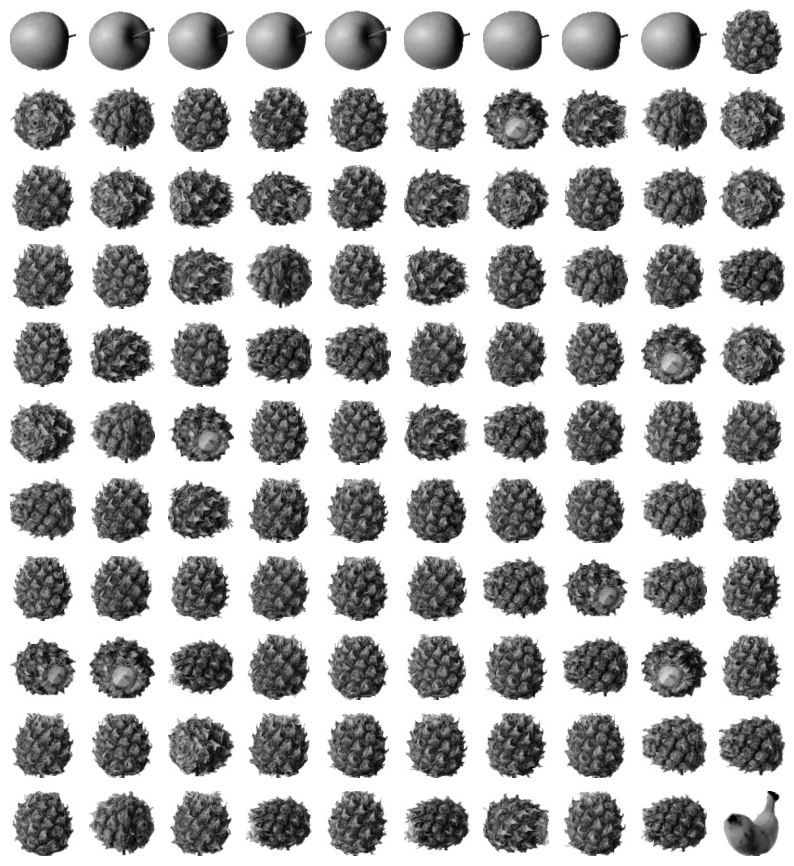

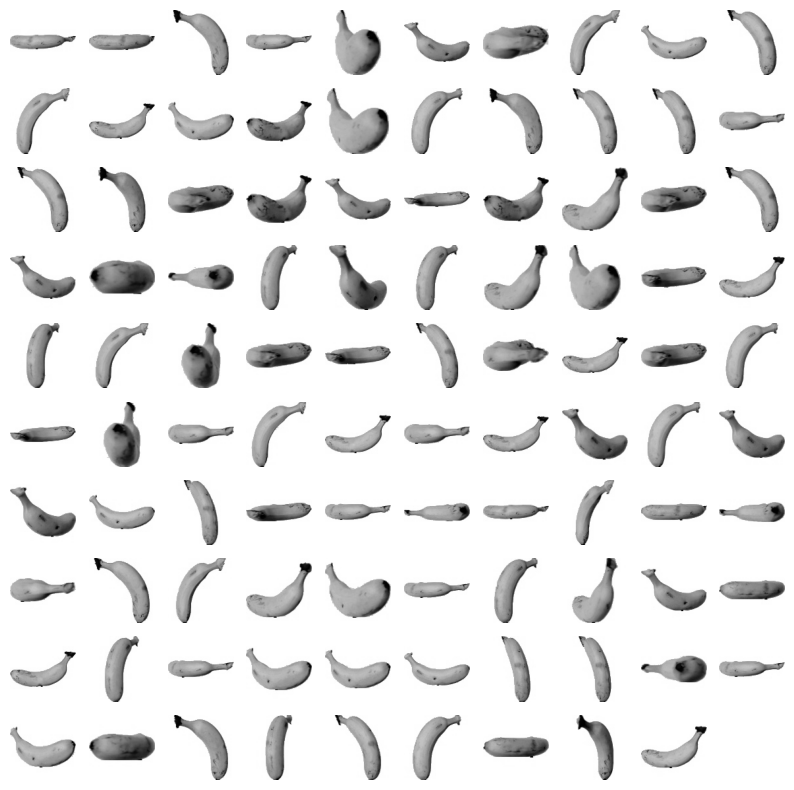

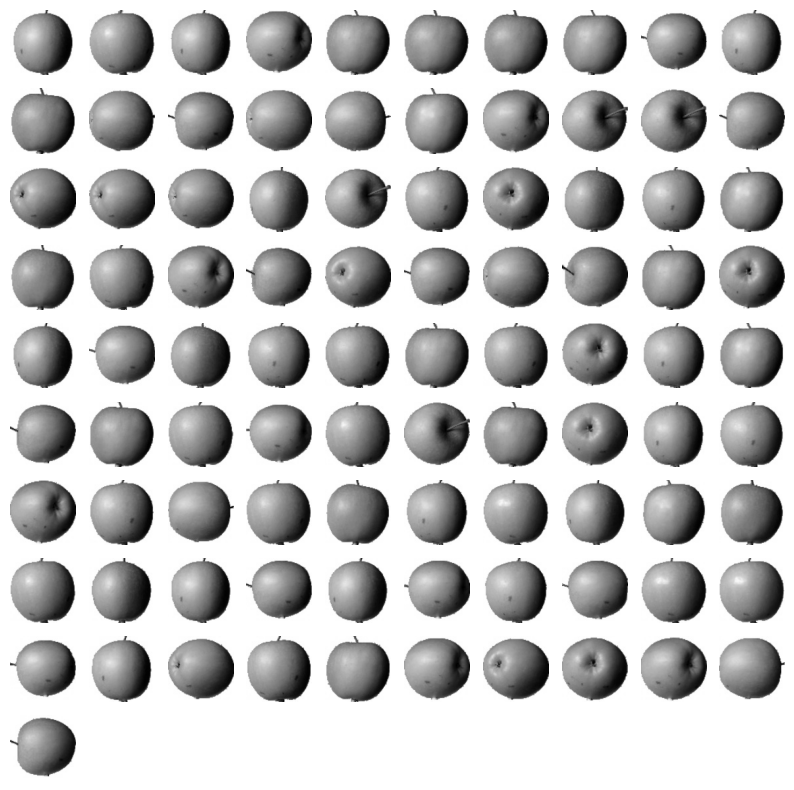

In [31]:
# KMeans가 찾은 레이블 이용해 과일 이미지 출력
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

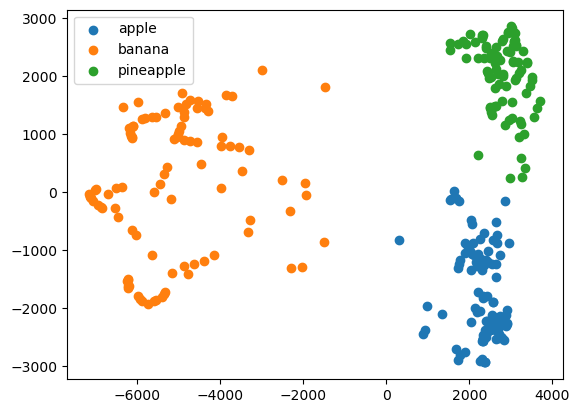

In [33]:
# km.labels 사용해 클러스터별 산점도 그리기
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

- 차원 축소를 사용하면 데이터셋의 크기를 줄일 수 있고 비교적 시각화하기 쉬움  
- 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용해 성능을 높이거나 훈련 속도를 빠르게 만들 수 있음  